In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.inspection import DecisionBoundaryDisplay

In [6]:

#library for iris data
from sklearn.datasets import load_iris


In [2]:
# Load data
iris = load_iris()

features=iris.feature_names
print(features)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
X = iris.data[:, :2]  # we only take the first two features: 'sepal length', 'sepal width'

# Extracting Target / Class Labels
y = iris.target

print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [17]:
# Train Test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                     train_size = 0.2, 
                                     test_size = 0.7, 
                                     random_state = 42)

In [18]:
# Create an instance of Logistic Regression Classifier and fit the data.

clf = LogisticRegression(C=1e5)
clf.fit(X_train, y_train)

LogisticRegression(C=100000.0)

In [19]:
#evaluation on training data

y_pred = clf.predict(X_train)

print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[ 8  0  0]
 [ 0  9  2]
 [ 0  1 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.90      0.82      0.86        11
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



Text(0.5, 1.0, '3-Class classification with Logistic Regression- Training Data')

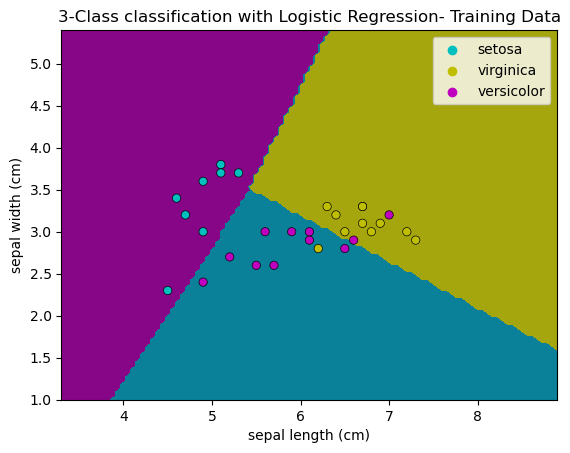

In [20]:
# Plot the decision boundary

# Create color maps
cmap_boundary = ListedColormap(["#870587", "#0a8199","#a5a50d"])
cmap_scatter = ["c", "y","m"] 

DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=cmap_boundary, #add colortheme
    response_method="predict",
    xlabel=features[0],
    ylabel=features[1],
)

# Plot training data

sns.scatterplot(
        x=X_train[:, 0],
        y=X_train[:, 1],
        hue=iris.target_names[y_train],
        palette=cmap_scatter,
        alpha=1.0,
        edgecolor="black",
    )

plt.title("3-Class classification with Logistic Regression- Training Data")

Text(0.5, 1.0, '3-Class classification with Logistic Regression- Test Data')

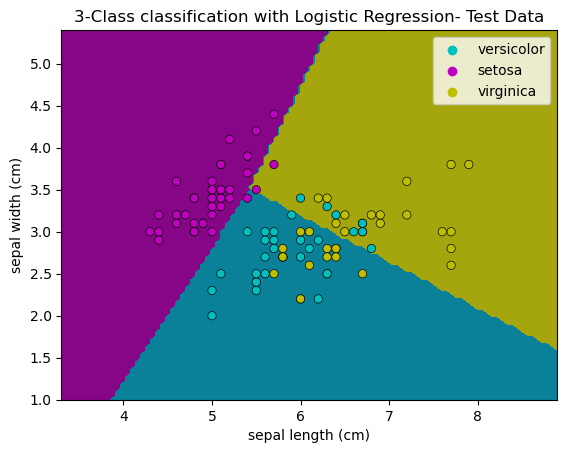

In [21]:
# Plot the decision boundary

# Create color maps
cmap_boundary = ListedColormap(["#870587", "#0a8199","#a5a50d"])
cmap_scatter = ["c", "m", "y"] 

DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=cmap_boundary, #add colortheme
    response_method="predict",
    xlabel=features[0],
    ylabel=features[1],
)

# Plot training data

sns.scatterplot(
        x=X_test[:, 0],
        y=X_test[:, 1],
        hue=iris.target_names[y_test],
        palette=cmap_scatter,
        alpha=1.0,
        edgecolor="black",
    )

plt.title("3-Class classification with Logistic Regression- Test Data")

In [ ]:
#evaluation on test data

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))